# Automobile Dataset Analysis

In [2]:
import pandas as pd

Firstly, import the dataset into a pandas dataframe

In [3]:
df = pd.read_csv("Automobile_data.csv")

In [4]:
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


#### Question 1
##### Find the most expensive and least expensive automobiles from the given dataset.

In [5]:
max_price = df['price'].max()
min_price = df['price'].min()

The most expensive automobiles

In [6]:
max_price_filter = (df['price'] == max_price)
df.loc[max_price_filter]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0


The least expensive automobiles

In [7]:
min_price_filter = (df['price'] == min_price)
df.loc[min_price_filter]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
13,16,chevrolet,hatchback,88.4,141.1,l,three,48,47,5151.0


#### Question 2
##### Find the average price for each company

In [8]:
company_group = df.groupby('company')
mean_price = company_group.aggregate({'price': ['mean']})

In [9]:
mean_price

,price
,mean
company,
alfa-romero,15498.333333
audi,16392.500000
bmw,27213.333333
chevrolet,6007.000000
dodge,6303.000000
honda,10195.000000
isuzu,6785.000000
jaguar,34600.000000


#### Question 3
##### Generate length to price ratio for each automobile (for example, if the length is L and the price is P, length-to-price ratio is L/P). Set the column name as LoP.

In [11]:
df['LoP'] = df['length'] / df['price']

In [12]:
df

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,LoP
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0,0.012508
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0,0.010230
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0,0.010376
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0,0.012659
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0,0.010120
...,...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0,0.021530
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0,0.021476
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0,0.017179
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0,0.014590


#### Question 4
##### Plot the newly generated LoP data.

In [17]:
import matplotlib.pyplot as plt

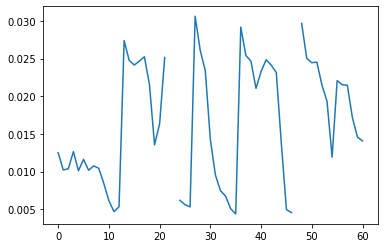

In [18]:
df['LoP'].plot()
plt.show()

#### Question 5
##### Find the most powerful cars for each different body-styles.

In [20]:
power_style = df.groupby('body-style').aggregate({'horsepower': ['max']})
power_style

,horsepower
,max
body-style,
convertible,207
hardtop,207
hatchback,288
sedan,262
wagon,156


#### Question 6
##### Split the dataset into parts based on companies and save them into different CSV files without the index column.

In [43]:
# Iterate over all the unique companies in the dataset
for company in df['company'].unique():
    # Create a filter which would select the current company
    company_filter = df['company'] == company
    # Get only those rows having the company as selected by the previous filter
    company_df = df.loc[company_filter]
    # Drop the index column
    company_df = company_df.drop(columns = ['index'])
    # Write out the DataFrame to CSV without the index
    company_df.to_csv(f".\companies\{company}.csv", index = False)